In [ ]:
!pip install langchain_community
!pip install replicate
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 2.1 MB/s eta 0:00:00


In [ ]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [ ]:
# Mengimpor modul yang diperlukan
from google.colab import userdata
import os
import pandas as pd
from langchain_community.llms import Replicate
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

In [ ]:
# Mengambil token API dari Google Colab Secrets
try:
    token = userdata.get("api_token")
    os.environ["REPLICATE_API_TOKEN"] = token
    print("Token API berhasil dimuat.")
except Exception as e:
    print("Error: Token API tidak ditemukan. Pastikan Anda telah menyimpannya di Colab Secrets dengan nama 'REPLICATE_API_TOKEN'.")
    exit()

Token API berhasil dimuat.


In [ ]:
# Memuat model IBM Granite dari Replicate
llm = Replicate(
    model="ibm-granite/granite-3.3-8b-instruct",
)

In [ ]:
test_prompt = "Sebutkan 5 alasan utama data science penting dalam kesehatan."
output_test = llm.invoke(test_prompt)
print(f"Output uji coba LLM: {output_test}\n")

Output uji coba LLM: 1. **Predictive Analytics**: Data science enables the development of predictive models that can forecast disease outbreaks, patient readmissions, and individual health risks. This proactive approach allows healthcare providers to allocate resources effectively and implement preventive measures.

2. **Personalized Medicine**: By analyzing genetic, environmental, and lifestyle data, data science facilitates personalized treatment plans. This tailored approach can improve patient outcomes, minimize adverse drug reactions, and optimize resource allocation.

3. **Medical Imaging and Diagnostics**: Data science enhances medical image analysis, such as MRI, CT scans, and X-rays, by applying machine learning algorithms. These algorithms can detect abnormalities, assist in diagnosis, and even predict disease progression, leading to earlier interventions and improved patient care.

4. **Public Health Surveillance**: Data science plays a crucial role in monitoring and analyzi

In [ ]:
file_path = 'heart.csv'
try:
    df = pd.read_csv(file_path)
    print(f"Dataset '{file_path}' berhasil dimuat.")
except FileNotFoundError:
    print(f"File '{file_path}' tidak ditemukan. Membuat dataset dummy untuk demonstrasi.")
    data = {
        'age': [58, 67, 57, 56, 57],
        'chol': [210, 260, 230, 250, 240],
        'thalachh': [140, 150, 160, 170, 180],
        'cp': [2, 1, 0, 3, 2],
        'exng': [0, 1, 0, 1, 0],
        'output': [0, 1, 0, 1, 1]
    }
    df = pd.DataFrame(data)

Dataset 'heart.csv' berhasil dimuat.


In [ ]:
df = pd.read_csv("heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
# Memeriksa data yang hilang
print("\nMemeriksa data yang hilang...")
print(df.isnull().sum())

# Menangani fitur kategorikal dengan one-hot encoding
categorical_cols = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\nKolom setelah one-hot encoding:")
print(df_encoded.columns)


Memeriksa data yang hilang...
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Kolom setelah one-hot encoding:
Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')


In [ ]:
# Memisahkan fitur (X) dan target (y) dari df_encoded
# 'HeartDisease' adalah variabel target (0 = tidak gagal, 1 = gagal jantung)
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

# Replace 0 values in 'Cholesterol' with NaN, then impute with the mean
X['Cholesterol'] = X['Cholesterol'].replace(0, np.nan)
X['Cholesterol'].fillna(X['Cholesterol'].mean(), inplace=True)

# Membagi data menjadi data pelatihan (training) dan pengujian (testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menggunakan Pipeline untuk normalisasi dan model Regresi Logistik
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=2000))
])

# Melatih pipeline
pipeline.fit(X_train, y_train)

# Membuat prediksi
y_pred = pipeline.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

print(f"\nAkurasi model prediksi: {accuracy:.2f}")

# Menampilkan laporan klasifikasi dalam format string
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))


Akurasi model prediksi: 0.87

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        77
           1       0.91      0.86      0.88       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



/tmp/ipython-input-3761770993.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Cholesterol'].fillna(X['Cholesterol'].mean(), inplace=True)


In [ ]:
# Menyiapkan temuan utama dalam bentuk teks
findings_text = f"""
Berikut adalah metrik evaluasi dari model prediksi penyakit jantung:
Akurasi: {accuracy:.2f}
Laporan Klasifikasi:
{classification_report(y_test, y_pred)}

Fitur-fitur yang paling berpengaruh pada model (berdasarkan koefisien):
{pd.Series(np.abs(pipeline.named_steps['classifier'].coef_[0]), index=X.columns).nlargest(5)}
"""

# Prompt untuk meminta LLM meringkas dan memberikan interpretasi
prompt = f"""
Analisis data kesehatan berikut menghasilkan metrik kinerja model dan daftar fitur berpengaruh.
Berdasarkan temuan di bawah, jelaskan dengan singkat dan mudah dipahami:
1. Apa arti dari metrik `precision`, `recall`, dan `f1-score`, khususnya untuk kelas '1' (gagal jantung)?
2. Mengapa `recall` sangat penting dalam diagnosis penyakit seperti gagal jantung?

Temuan:
{findings_text}

Ringkasan dan Interpretasi:
"""
print("Meminta LLM untuk interpretasi mendalam dari metrik model...")
llm_interpretation = llm.invoke(prompt)
print(f"\nInterpretasi dari AI:\n{llm_interpretation}")

Meminta LLM untuk interpretasi mendalam dari metrik model...

Interpretasi dari AI:
1. **Arti Metrik `precision`, `recall`, dan `f1-score`:**

   - **Precision (Sensitivitas):** Dalam konteks ini, precision untuk kelas '1' (gagal jantung) mengacu pada proporsi prediksi yang benar (kematian jantung) diantaranya yang sebenarnya benar. Ia mengukur keakuratan diagnosis. Nilai precision yang lebih tinggi berarti model lebih efektif dalam mengidentifikasi pasien yang memiliki gagal jantung.

   - **Recall (Sensitivitas):** Recall untuk kelas '1' mengacu pada proporsi pasien yang memiliki gagal jantung yang sebenarnya diidentifikasi sebagai gagal jantung oleh model. Ia mengukur kemampuan model untuk menangkap semua kasus benar (sensitif) tanpa mengabaikan kasus benar. Nilai recall yang lebih tinggi berarti model lebih baik dalam mendeteksi semua pasien yang memiliki gagal jantung.

   - **F1-score:** F1-score adalah harmonik dari precision dan recall. Ia menggabungkan kedua metrik ke dalam sa

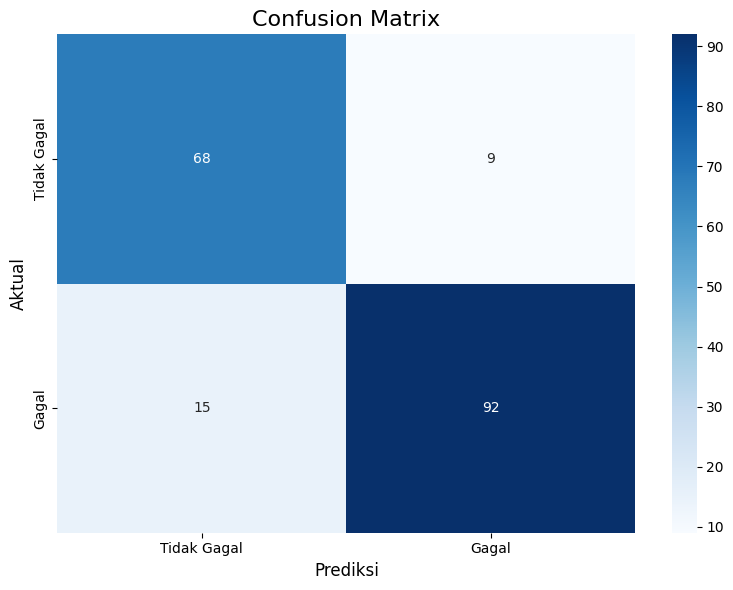

In [ ]:
# Visualisasi Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Gagal', 'Gagal'],
            yticklabels=['Tidak Gagal', 'Gagal'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Prediksi', fontsize=12)
plt.ylabel('Aktual', fontsize=12)
plt.tight_layout()
plt.show()

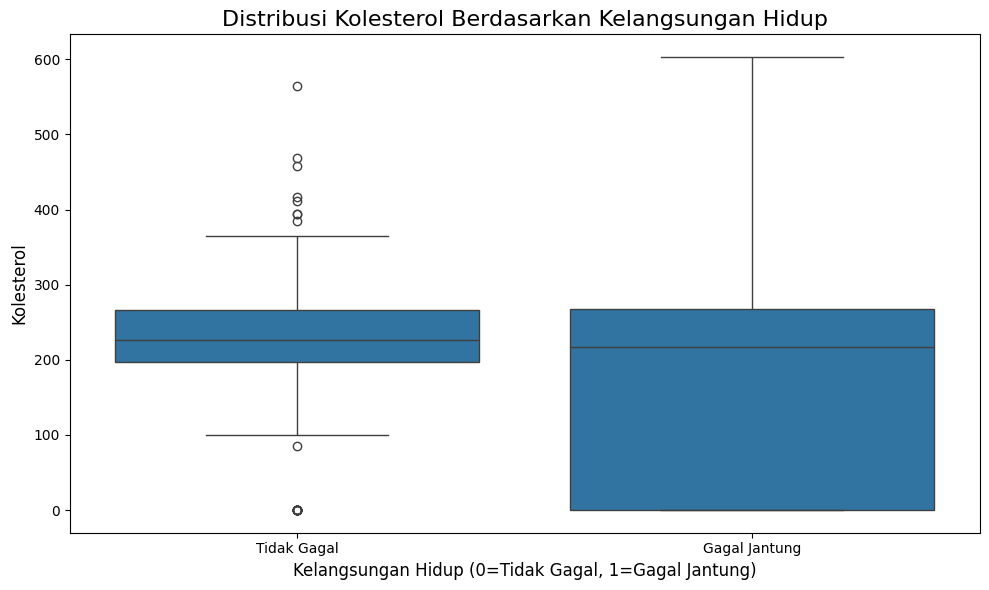

In [ ]:
# Visualisasi distribusi 'chol' (kolesterol) berdasarkan 'output' (kelangsungan hidup)
plt.figure(figsize=(10, 6))
sns.boxplot(x='HeartDisease', y='Cholesterol', data=df)
plt.title('Distribusi Kolesterol Berdasarkan Kelangsungan Hidup', fontsize=16)
plt.xlabel('Kelangsungan Hidup (0=Tidak Gagal, 1=Gagal Jantung)', fontsize=12)
plt.ylabel('Kolesterol', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Tidak Gagal', 'Gagal Jantung'])
plt.tight_layout()
plt.show()

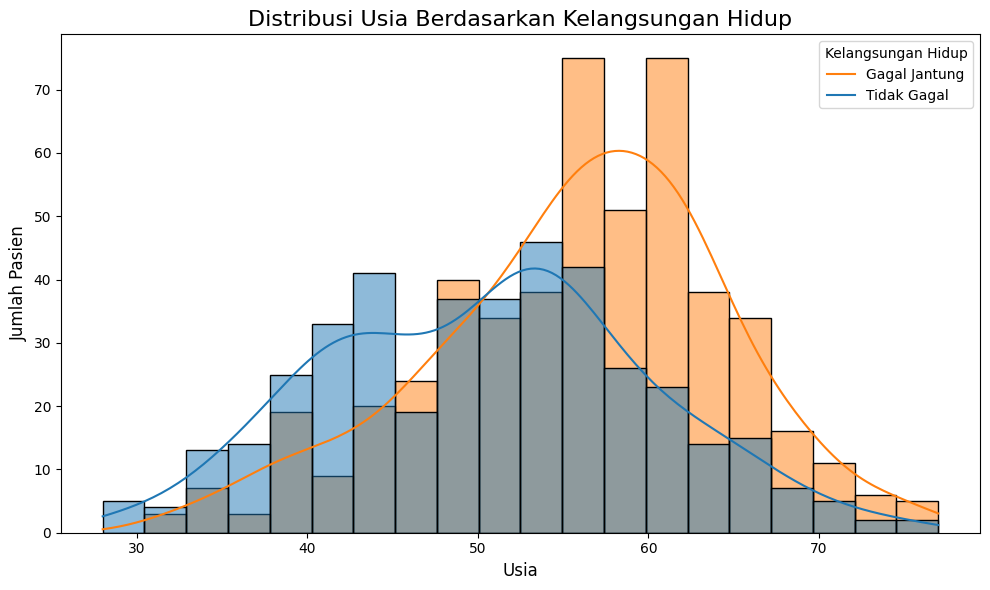

In [ ]:
# Visualisasi distribusi 'age' (usia) berdasarkan 'output'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='HeartDisease', kde=True, bins=20)
plt.title('Distribusi Usia Berdasarkan Kelangsungan Hidup', fontsize=16)
plt.xlabel('Usia', fontsize=12)
plt.ylabel('Jumlah Pasien', fontsize=12)
plt.legend(title='Kelangsungan Hidup', labels=['Gagal Jantung', 'Tidak Gagal'])
plt.tight_layout()
plt.show()